In [1]:
import numpy as np

import rnnfunctions as fs
import tensorflow as tf
import config

In [2]:
b = 5000
objects = config.DRAWING_NAMES
data, labels = fs.load_data(limit_per_class=1000 + b, beginning=b, class_names=objects)

Loading data from ../.././data/nparrays/airplane.npy
Loading data from ../.././data/nparrays/alarm clock.npy
Loading data from ../.././data/nparrays/angel.npy
Loading data from ../.././data/nparrays/ant.npy
Loading data from ../.././data/nparrays/anvil.npy
Loading data from ../.././data/nparrays/apple.npy
Loading data from ../.././data/nparrays/arm.npy
Loading data from ../.././data/nparrays/axe.npy
Loading data from ../.././data/nparrays/backpack.npy
Loading data from ../.././data/nparrays/banana.npy
Loading data from ../.././data/nparrays/bandage.npy
Loading data from ../.././data/nparrays/barn.npy
Loading data from ../.././data/nparrays/baseball.npy
Loading data from ../.././data/nparrays/baseball bat.npy
Loading data from ../.././data/nparrays/basket.npy
Loading data from ../.././data/nparrays/basketball.npy
Loading data from ../.././data/nparrays/bat.npy
Loading data from ../.././data/nparrays/bee.npy
Loading data from ../.././data/nparrays/bicycle.npy
Loading data from ../.././da

In [3]:
x_train, x_test, y_train, y_test = fs.split_data(data, labels)

In [4]:
model = fs.create_rnn_model((75, 2), len(objects))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 75, 256)        │       134,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 75, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 221)            │        28,509 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 442,333 (1.69 MB)

 Trainable params: 442,333 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
fs.train_model(model, x_train, y_train, x_test, y_test, epochs=5)

Epoch 1/5
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 793s 164ms/step - accuracy: 0.3852 - loss: 2.7571 - val_accuracy: 0.4406 - val_loss: 2.4784 - learning_rate: 0.0010
Epoch 2/5
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 583s 121ms/step - accuracy: 0.4184 - loss: 2.6262 - val_accuracy: 0.4628 - val_loss: 2.3777 - learning_rate: 0.0010
Epoch 3/5
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 515s 106ms/step - accuracy: 0.4416 - loss: 2.5108 - val_accuracy: 0.4992 - val_loss: 2.2283 - learning_rate: 0.0010
Epoch 4/5
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 517s 107ms/step - accuracy: 0.4650 - loss: 2.4069 - val_accuracy: 0.5235 - val_loss: 2.1225 - learning_rate: 0.0010
Epoch 5/5
4835/4835 ━━━━━━━━━━━━━━━━━━━━ 519s 107ms/step - accuracy: 0.4766 - loss: 2.3527 - val_accuracy: 0.5158 - val_loss: 2.1287 - learning_rate: 0.0010


In [6]:
model.save("RNN.keras")

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get class predictions

3235/3235 ━━━━━━━━━━━━━━━━━━━━ 323s 99ms/step


In [6]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)

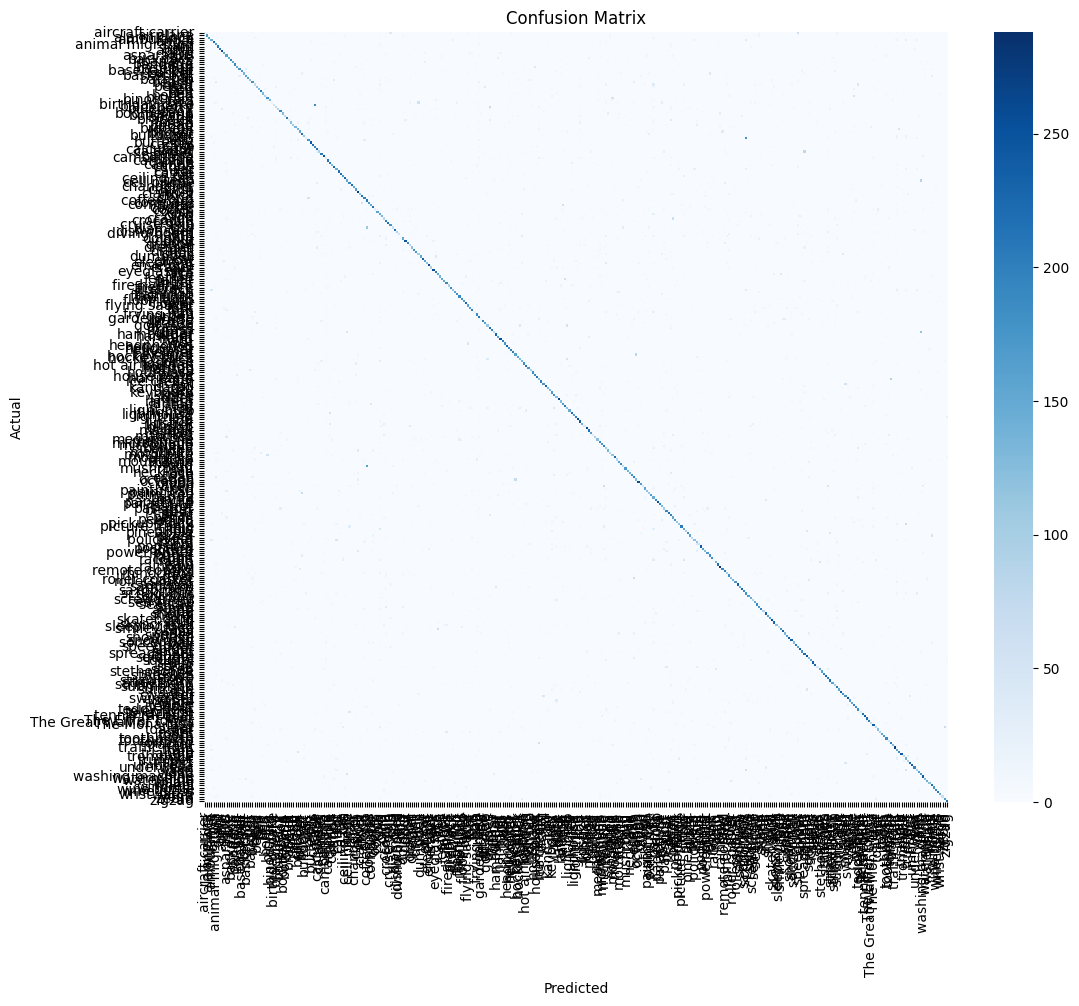

                         precision    recall  f1-score   support

       aircraft carrier       0.23      0.05      0.08       332
               airplane       0.72      0.56      0.63       304
            alarm clock       0.57      0.56      0.56       294
              ambulance       0.47      0.45      0.46       317
                  angel       0.56      0.75      0.64       297
       animal migration       0.28      0.59      0.38       281
                    ant       0.64      0.71      0.67       296
                  anvil       0.71      0.67      0.69       301
                  apple       0.68      0.84      0.75       299
                    arm       0.56      0.51      0.53       289
              asparagus       0.38      0.55      0.45       293
                    axe       0.63      0.50      0.56       297
               backpack       0.63      0.67      0.65       288
                 banana       0.61      0.52      0.56       296
                bandage 

In [7]:
# Visualize the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues', xticklabels=objects, yticklabels=objects)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=objects))

In [8]:
f1_threshold = 0.5
meter = 'f1-score'
report = classification_report(y_test, y_pred_classes, target_names=objects, output_dict=True)
filtered_report = {i: report[i][meter] for i in report
                   if isinstance(report[i], dict) and  report[i][meter] < f1_threshold}

# Print filtered report
print(f"Filtered Classes Based on {meter}:")
for cls, metrics in filtered_report.items():
    print(f"Class {cls}: {meter} = {metrics}")

Filtered Classes Based on f1-score:
Class aircraft carrier: f1-score = 0.08395061728395062
Class ambulance: f1-score = 0.46029173419773095
Class animal migration: f1-score = 0.37813211845102507
Class asparagus: f1-score = 0.44751381215469616
Class bathtub: f1-score = 0.4662576687116564
Class beach: f1-score = 0.44471744471744473
Class bear: f1-score = 0.26013513513513514
Class beard: f1-score = 0.4398496240601504
Class bed: f1-score = 0.49609375
Class belt: f1-score = 0.4421768707482993
Class bench: f1-score = 0.416289592760181
Class bird: f1-score = 0.096
Class birthday cake: f1-score = 0.2827763496143959
Class blackberry: f1-score = 0.22255639097744362
Class blueberry: f1-score = 0.3879310344827586
Class bottlecap: f1-score = 0.3793103448275862
Class bracelet: f1-score = 0.18716577540106952
Class brain: f1-score = 0.3257676902536716
Class bread: f1-score = 0.46021505376344085
Class broccoli: f1-score = 0.41420118343195267
Class bulldozer: f1-score = 0.42424242424242425
Class bus: f1-

In [9]:
for key in filtered_report:
    if key in objects:
        objects.remove(key)
print(objects)

['airplane', 'alarm clock', 'angel', 'ant', 'anvil', 'apple', 'arm', 'axe', 'backpack', 'banana', 'bandage', 'barn', 'baseball', 'baseball bat', 'basket', 'basketball', 'bat', 'bee', 'bicycle', 'binoculars', 'book', 'boomerang', 'bowtie', 'bridge', 'broom', 'bucket', 'bush', 'butterfly', 'cactus', 'calculator', 'camel', 'camera', 'campfire', 'candle', 'canoe', 'car', 'carrot', 'castle', 'cat', 'ceiling fan', 'cello', 'cell phone', 'chair', 'chandelier', 'church', 'circle', 'clock', 'cloud', 'compass', 'computer', 'cookie', 'couch', 'crab', 'crown', 'cruise ship', 'diamond', 'donut', 'door', 'dresser', 'drill', 'drums', 'dumbbell', 'ear', 'envelope', 'eye', 'eyeglasses', 'face', 'feather', 'fence', 'finger', 'fireplace', 'fish', 'flamingo', 'flashlight', 'flip flops', 'floor lamp', 'flower', 'flying saucer', 'foot', 'fork', 'giraffe', 'goatee', 'grapes', 'grass', 'hamburger', 'hammer', 'hand', 'harp', 'hat', 'headphones', 'helicopter', 'helmet', 'hexagon', 'hockey puck', 'hospital', 'ho

In [4]:
model = tf.keras.models.load_model("RNNall.keras")

In [9]:
objects = config.DRAWING_NAMES2
for b in range(0, 10001, 5000):
    data, labels = fs.load_data(limit_per_class=5000 + b, beginning=b, class_names=objects)
    x_train, x_test, y_train, y_test = fs.split_data(data, labels)
    fs.train_model(model, x_train, y_train, x_test, y_test, epochs=3)

Loading data from ../.././data/nparrays/aircraft carrier.npy
Loading data from ../.././data/nparrays/airplane.npy
Loading data from ../.././data/nparrays/alarm clock.npy
Loading data from ../.././data/nparrays/ambulance.npy
Loading data from ../.././data/nparrays/angel.npy
Loading data from ../.././data/nparrays/animal migration.npy
Loading data from ../.././data/nparrays/ant.npy
Loading data from ../.././data/nparrays/anvil.npy
Loading data from ../.././data/nparrays/apple.npy
Loading data from ../.././data/nparrays/arm.npy
Loading data from ../.././data/nparrays/asparagus.npy
Loading data from ../.././data/nparrays/axe.npy
Loading data from ../.././data/nparrays/backpack.npy
Loading data from ../.././data/nparrays/banana.npy
Loading data from ../.././data/nparrays/bandage.npy
Loading data from ../.././data/nparrays/barn.npy
Loading data from ../.././data/nparrays/baseball.npy
Loading data from ../.././data/nparrays/baseball bat.npy
Loading data from ../.././data/nparrays/basket.npy
L

KeyboardInterrupt: 

In [12]:
model.save("RNNall.keras")

In [24]:
objects = config.DRAWING_NAMES
for b in range(10000, 20001, 1000):
    data, labels = fs.load_data(limit_per_class=1000 + b, beginning=b, class_names=objects)
    x_train, x_test, y_train, y_test = fs.split_data(data, labels)
    fs.train_model(model, x_train, y_train, x_test, y_test, epochs=3)

Loading data from ../.././data/nparrays/airplane.npy
Loading data from ../.././data/nparrays/alarm clock.npy
Loading data from ../.././data/nparrays/ambulance.npy
Loading data from ../.././data/nparrays/angel.npy
Loading data from ../.././data/nparrays/animal migration.npy
Loading data from ../.././data/nparrays/ant.npy
Loading data from ../.././data/nparrays/anvil.npy
Loading data from ../.././data/nparrays/apple.npy
Loading data from ../.././data/nparrays/arm.npy
Loading data from ../.././data/nparrays/asparagus.npy
Loading data from ../.././data/nparrays/axe.npy
Loading data from ../.././data/nparrays/backpack.npy
Loading data from ../.././data/nparrays/banana.npy
Loading data from ../.././data/nparrays/bandage.npy
Loading data from ../.././data/nparrays/barn.npy
Loading data from ../.././data/nparrays/baseball.npy
Loading data from ../.././data/nparrays/baseball bat.npy
Loading data from ../.././data/nparrays/basket.npy
Loading data from ../.././data/nparrays/basketball.npy
Loading

KeyboardInterrupt: 